# Going Deeper
>  By the end of this chapter, you will know how to solve binary, multi-class, and multi-label problems with neural networks. All of this by solving problems like detecting fake dollar bills, deciding who threw which dart at a board, and building an intelligent system to water your farm. You will also be able to plot model training metrics and to stop training and save your models when they no longer improve.

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp]
- image: images/datacamp/___

> Note: This is a summary of the course's chapter 2 exercises "Introduction to Deep Learning with Keras" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 8)

## Binary classification

### Exploring dollar bills

<div class=""><p>You will practice building classification models in Keras with the <strong>Banknote Authentication</strong> dataset. </p>
<p>Your goal is to distinguish between real and fake dollar bills. In order to do this, the dataset comes with 4 features: <code>variance</code>,<code>skewness</code>,<code>kurtosis</code> and <code>entropy</code>. These features are calculated by applying mathematical operations over the dollar bill images. The labels are found in the dataframe's <code>class</code> column.</p>
<p></p><center>
<img src="https://assets.datacamp.com/production/repositories/4335/datasets/6ce6fd4fdc548ecd6aaa27b033073c5bfc0995da/dollar_bills.png" height="250px">
</center><p></p>
<p>A pandas DataFrame named <code>banknotes</code> is ready to use, let's do some data exploration!</p></div>

In [7]:
banknotes = pd.read_csv('https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/16-introduction-to-deep-learning-with-keras/datasets/banknotes.csv')

Instructions
<ul>
<li>Import <code>seaborn</code> as <code>sns</code>.</li>
<li>Use <code>seaborn</code>'s <code>pairplot()</code> on <code>banknotes</code> and set <code>hue</code> to be the name of the column containing the labels.</li>
<li>Generate descriptive statistics for the banknotes authentication data.</li>
<li>Count the number of observations per label with <code>.value_counts()</code>.</li>
</ul>

In [9]:
banknotes

,variance,skewness,curtosis,entropy,class
0,-1.402223,-0.004577,-0.281104,-0.594808,fake
1,0.308849,0.447228,0.207933,0.674714,real
2,-1.566314,-1.744472,2.566364,-0.117055,fake
3,-1.954001,0.805577,-0.335993,-2.537293,fake
4,1.124375,-0.189049,0.053400,0.936998,real
...,...,...,...,...,...
91,0.115386,0.664498,-0.046821,0.259744,real
92,-1.147343,-1.868626,1.780630,0.099668,fake
93,0.689005,0.448984,-1.482300,-0.812782,fake
94,-0.450724,0.206335,-1.023296,-0.831875,fake


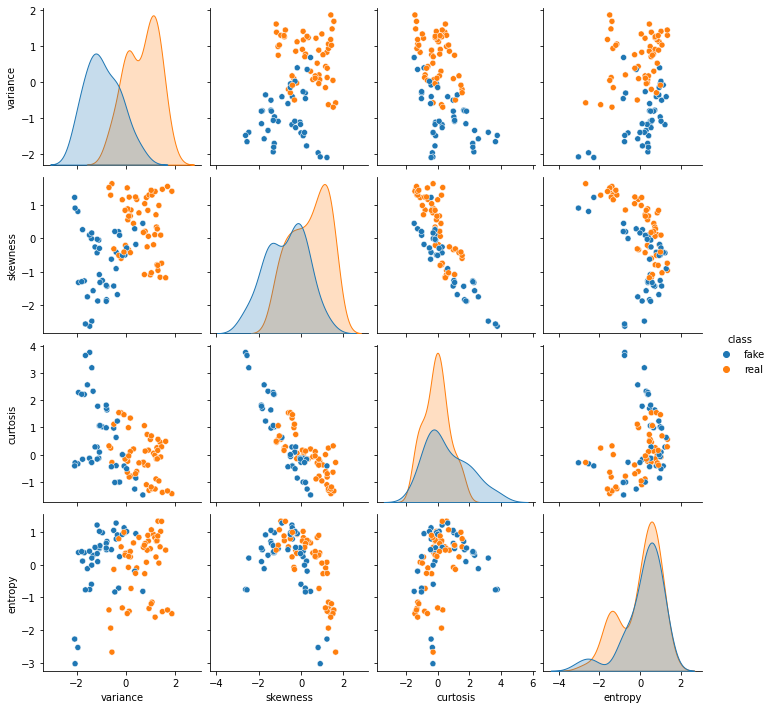

In [10]:
X = banknotes.iloc[:, :4]
X = ((X - X.mean()) / X.std()).to_numpy()
y = banknotes['class'].to_numpy()
sns.pairplot(banknotes, hue='class');

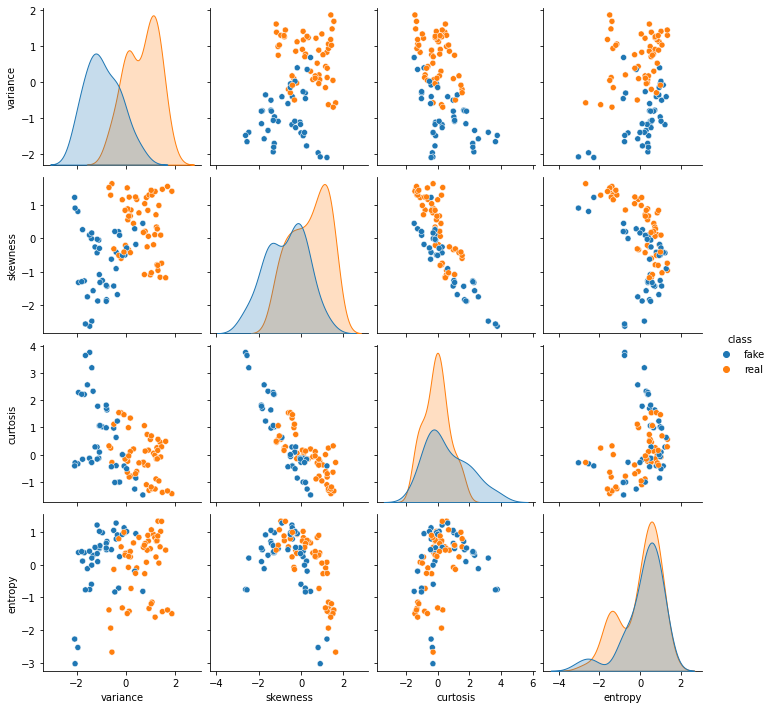

Dataset stats: 
         variance   skewness   curtosis    entropy
count  96.000000  96.000000  96.000000  96.000000
mean   -0.057791  -0.102829   0.230412   0.081497
std     1.044960   1.059236   1.128972   0.975565
min    -2.084590  -2.621646  -1.482300  -3.034187
25%    -0.839124  -0.916152  -0.415294  -0.262668
50%    -0.026748  -0.037559  -0.033603   0.394888
75%     0.871034   0.813601   0.978766   0.745212
max     1.869239   1.634072   3.759017   1.343345
Observations per class: 
 real    53
fake    43
Name: class, dtype: int64


In [8]:
# Import seaborn
import seaborn as sns

# Use pairplot and set the hue to be our class column
sns.pairplot(banknotes, hue='class') 

# Show the plot
plt.show()

# Describe the data
print('Dataset stats: \n', banknotes.describe())

# Count the number of observations per class
print('Observations per class: \n', banknotes['class'].value_counts())

**Your pairplot shows that there are features for which the classes spread out noticeably. This gives us an intuition about our classes being easily separable. Let's build a model to find out what it can do!**

### A binary classification model

<div class=""><p>Now that you know what the <strong>Banknote Authentication</strong> dataset looks like, we'll build a simple model to distinguish between real and fake bills. </p>
<p>You will perform binary classification by using a single neuron as an output. The input layer will have 4 neurons since we have 4 features in our dataset. The model's output will be a value constrained between 0 and 1. </p>
<p>We will interpret this output number as the probability of our input variables coming from a fake dollar bill, with 1 meaning we are certain it's a fake bill.</p>
<p></p><center>
<img src="https://assets.datacamp.com/production/repositories/4335/datasets/db1c482fd8cb154572c3ce79fe9a406c25ed1a9b/model_chapter2_binary_classification.JPG" height="250px">
</center><p></p></div>

Instructions
<ul>
<li>Import the <code>Sequential</code> model and <code>Dense</code> layer from Keras.</li>
<li>Create a sequential model.</li>
<li>Add a 4 neuron input layer with the <code>input_shape</code> parameter and a 1 neuron output layer with <code>sigmoid</code> activation. </li>
<li>Compile your model using <code>sgd</code> as an optimizer.</li>
</ul>

In [11]:
# Import the sequential model and dense layer
from keras.models import Sequential
from keras.layers import Dense

# Create a sequential model
model = Sequential()

# Add a dense layer 
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

# Compile your model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Display a summary of your model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


**Let's use this classification model to detect fake dollar bills!**

### Is this dollar bill fake ?

<p>You are now ready to train your <code>model</code> and check how well it performs when classifying new bills!
The dataset has already been partitioned into features: <code>X_train</code> &amp; <code>X_test</code>, and labels: <code>y_train</code> &amp; <code>y_test</code>.</p>

In [188]:
df = pd.read_csv('https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/16-introduction-to-deep-learning-with-keras/datasets/banknotes_1372x5.csv')
X, y = df.iloc[:, :-1], df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)

Instructions
<ul>
<li>Train your model for 20 epochs calling <code>.fit()</code>, passing in the training data.</li>
<li>Check your model accuracy using the <code>.evaluate()</code> method on the test data.</li>
<li>Print <code>accuracy</code>.</li>
</ul>

In [66]:
# Train your model for 20 epochs
model.fit(X_train, y_train, epochs = 20)

# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

Epoch 1/20
30/30 [==============================] - 1s 1ms/step - loss: 0.7932 - accuracy: 0.5251
Epoch 2/20
30/30 [==============================] - 0s 880us/step - loss: 0.7157 - accuracy: 0.5642
Epoch 3/20
30/30 [==============================] - 0s 1ms/step - loss: 0.6722 - accuracy: 0.5756
Epoch 4/20
30/30 [==============================] - 0s 946us/step - loss: 0.6117 - accuracy: 0.6191
Epoch 5/20
30/30 [==============================] - 0s 978us/step - loss: 0.5692 - accuracy: 0.6570
Epoch 6/20
30/30 [==============================] - 0s 937us/step - loss: 0.5534 - accuracy: 0.6862
Epoch 7/20
30/30 [==============================] - 0s 976us/step - loss: 0.5177 - accuracy: 0.7247
Epoch 8/20
30/30 [==============================] - 0s 1ms/step - loss: 0.4905 - accuracy: 0.7817
Epoch 9/20
30/30 [==============================] - 0s 912us/step - loss: 0.4543 - accuracy: 0.8251
Epoch 10/20
30/30 [==============================] - 0s 1ms/step - loss: 0.4658 - accuracy: 0.8415
Epoch 1



```
960/960 [==============================] - 0s 59us/step - loss: 0.4266 - acc: 0.8250
    412/412 [==============================] - 0s 57us/step
    Accuracy: 0.8252427167105443
```


**It looks like you are getting a high accuracy even with this simple model!**

## Multi-class classification

### A multi-class model

<div class=""><p>You're going to build a model that predicts who threw which dart only based on where that dart landed! (That is the dart's x and y coordinates on the board.)</p>
<p>This problem is a multi-class classification problem since each dart can only be thrown by one of 4 competitors. So classes/labels are mutually exclusive, and therefore we can build a neuron with as many output as competitors and use the <code>softmax</code> activation function to achieve a total sum of probabilities of 1 over all competitors.</p>
<p>Keras <code>Sequential</code> model and <code>Dense</code> layer are already loaded for you to use.</p></div>

Instructions
<ul>
<li>Instantiate a <code>Sequential</code> model.</li>
<li>Add 3 dense layers of 128, 64 and 32 neurons each.</li>
<li>Add a final dense layer with as many neurons as competitors.</li>
<li>Compile your model using <code>categorical_crossentropy</code> loss.</li>
</ul>

In [121]:
# Instantiate a sequential model
model = Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
model.add(Dense(128, input_shape=(2,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
  
# Add a dense layer with as many neurons as competitors
model.add(Dense(4, activation='softmax'))
  
# Compile your model using categorical_crossentropy loss
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

**Your models are increasing in depth, just as your knowledge on neural networks!**

### Prepare your dataset

<div class=""><p>In the console you can check that your labels, <code>darts.competitor</code> are not yet in a format to be understood by your network. They contain the names of the competitors as strings. You will first turn these competitors into unique numbers,then use the <code>to_categorical()</code> function from <code>keras.utils</code> to turn these numbers into their one-hot encoded representation. </p>
<p>This is useful for multi-class classification problems, since there are as many output neurons as classes and for every observation in our dataset we just want one of the neurons to be activated.</p>
<p>The dart's dataset is loaded as <code>darts</code>. Pandas is imported as <code>pd</code>. Let's prepare this dataset!</p></div>

In [99]:
darts = pd.read_csv('https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/16-introduction-to-deep-learning-with-keras/datasets/darts.csv')

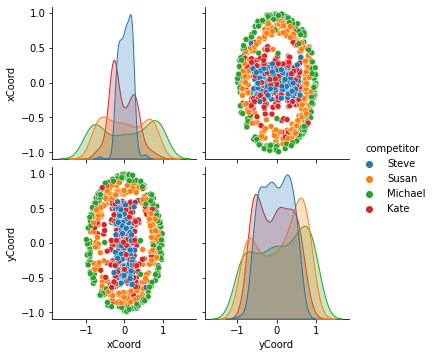

In [76]:
sns.pairplot(darts, hue='competitor');

Instructions 1/2
<ul>
<li>Use the <code>Categorical()</code> method from pandas to transform the <code>competitor</code> column.</li>
<li>Assign a number to each competitor using the <code>cat.codes</code> attribute from the competitor column.</li>
</ul>

In [100]:
# Transform into a categorical variable
darts.competitor = pd.Categorical(darts.competitor)

# Assign a number to each category (label encoding)
darts.competitor = darts.competitor.cat.codes

# Print the label encoded competitors
print('Label encoded competitors: \n',darts.competitor.head())

Label encoded competitors: 
 0    2
1    3
2    1
3    0
4    2
Name: competitor, dtype: int8


Instructions 2/2
<ul>
<li>Import <code>to_categorical</code> from <code>keras.utils</code>.</li>
<li>Apply <code>to_categorical()</code> to your labels.</li>
</ul>

In [103]:
# Import to_categorical from keras utils module
from keras.utils import to_categorical

coordinates = darts.drop(['competitor'], axis=1)
# Use to_categorical on your labels
competitors = to_categorical(darts.competitor)

# Now print the one-hot encoded labels
print('One-hot encoded competitors: \n',competitors)

One-hot encoded competitors: 
 [[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


**Each competitor is now a vector of length 4, full of zeroes except for the position representing her or himself.**

### Training on dart throwers

<div class=""><p>Your model is now ready, just as your dataset. It's time to train!</p>
<p>The <code>coordinates</code> features and <code>competitors</code> labels you just transformed have been partitioned into <code>coord_train</code>,<code>coord_test</code> and <code>competitors_train</code>,<code>competitors_test</code>.</p>
<p>Your <code>model</code> is also loaded. Feel free to visualize your training data or <code>model.summary()</code> in the console. </p>
<p>Let's find out who threw which dart just by looking at the board!</p></div>

In [117]:
coordinates = darts[['xCoord', 'yCoord']]
coord_train, coord_test, competitors_train, competitors_test = train_test_split(coordinates, competitors, test_size=0.2, random_state=27, stratify=competitors)

Instructions
<ul>
<li>Train your <code>model</code> on the training data for 200 <code>epochs</code>.</li>
<li>Evaluate your <code>model</code> accuracy on the test data.</li>
</ul>

In [123]:
# Fit your model to the training data for 200 epochs
model.fit(coord_train, competitors_train, epochs=200)

# Evaluate your model accuracy on the test data
accuracy = model.evaluate(coord_test, competitors_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

Epoch 1/200
20/20 [==============================] - 0s 2ms/step - loss: 1.3780 - accuracy: 0.2495
Epoch 2/200
20/20 [==============================] - 0s 1ms/step - loss: 1.3298 - accuracy: 0.2982
Epoch 3/200
20/20 [==============================] - 0s 2ms/step - loss: 1.2763 - accuracy: 0.3505
Epoch 4/200
20/20 [==============================] - 0s 2ms/step - loss: 1.2202 - accuracy: 0.4673
Epoch 5/200
20/20 [==============================] - 0s 2ms/step - loss: 1.1260 - accuracy: 0.4919
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 1.0243 - accuracy: 0.5787
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 0.9240 - accuracy: 0.6059
Epoch 8/200
20/20 [==============================] - 0s 2ms/step - loss: 0.8916 - accuracy: 0.6390
Epoch 9/200
20/20 [==============================] - 0s 2ms/step - loss: 0.8541 - accuracy: 0.6349
Epoch 10/200
20/20 [==============================] - 0s 2ms/step - loss: 0.8192 - accuracy: 0.6559
Epoch 11/



```
640/640 [==============================] - 0s 65us/step - loss: 0.5055 - acc: 0.8000
160/160 [==============================] - 0s 171us/step
    Accuracy: 0.85
```


**Your model just trained for 200 epochs! The accuracy on the test set is quite high. How are the predictions looking? Let's find out!**

### Softmax predictions

<div class=""><p>Your recently trained <code>model</code> is loaded for you. This model is generalizing well!, that's why you got a high accuracy on the test set.  </p>
<p>Since you used the <code>softmax</code> activation function, for every input of 2 coordinates provided to your model there's an output vector of 4 numbers. Each of these numbers encodes the probability of a given dart being thrown by one of the 4 possible competitors. </p>
<p>When computing accuracy with the model's <code>.evaluate()</code> method, your model takes the class with the highest probability as the prediction. <code>np.argmax()</code> can help you do this since it returns the index with the highest value in an array. </p>
<p>Use the collection of test throws stored in <code>coords_small_test</code> and <code>np.argmax()</code>to check this out!</p></div>

In [126]:
coords_small_test = pd.DataFrame({
    'xCoord':[0.209048, 0.082103, 0.198165, -0.348660, 0.214726],
    'yCoord':[-0.077398, -0.721407, -0.674646, 0.035086, 0.183894]
})

competitors_small_test = np.array([[0., 0., 1., 0.],
                                    [0., 0., 0., 1.],
                                    [0., 0., 0., 1.],
                                    [1., 0., 0., 0.],
                                    [0., 0., 1., 0.]], dtype=np.float32)

Instructions 1/2

<ul>
<li>Predict with your <code>model</code> on  <code>coords_small_test</code>.</li>
<li>Print the model predictions.</li>
</ul>

In [127]:
# Predict on coords_small_test
preds = model.predict(coords_small_test)

# Print preds vs true values
print("{:45} | {}".format('Raw Model Predictions','True labels'))
for i,pred in enumerate(preds):
  print("{} | {}".format(pred,competitors_small_test[i]))

Raw Model Predictions                         | True labels
[0.2984294  0.01107649 0.6603878  0.03010631] | [0. 0. 1. 0.]
[0.1566652  0.00222477 0.04040279 0.8007073 ] | [0. 0. 0. 1.]
[0.4577874  0.00183497 0.13365558 0.406722  ] | [0. 0. 0. 1.]
[0.85539305 0.04206886 0.07733677 0.02520132] | [1. 0. 0. 0.]
[0.3107672  0.00820614 0.6576296  0.02339708] | [0. 0. 1. 0.]


Instructions 2/2
<li>Use <code>np.argmax()</code>to extract the index of the highest probable competitor from each <code>pred</code> vector in <code>preds</code>.</li>

In [129]:
# Extract the position of highest probability from each pred vector
preds_chosen = [np.argmax(pred) for pred in preds]

# Print preds vs true values
print("{:10} | {}".format('Rounded Model Predictions','True labels'))
for i,pred in enumerate(preds_chosen):
  print("{:25} | {}".format(pred,competitors_small_test[i]))

Rounded Model Predictions | True labels
                        2 | [0. 0. 1. 0.]
                        3 | [0. 0. 0. 1.]
                        0 | [0. 0. 0. 1.]
                        0 | [1. 0. 0. 0.]
                        2 | [0. 0. 1. 0.]


**As you've seen you can easily interpret the softmax output. This can also help you spot those observations where your network is less certain on which class to predict, since you can see the probability distribution among classes per prediction. Let's learn how to solve new problems with neural networks!**

## Multi-label classification

### An irrigation machine

<div class=""><p>You're going to automate the watering of farm parcels by making an intelligent irrigation machine. Multi-label classification problems differ from multi-class problems in that each observation can be labeled with zero or more classes. So classes/labels are not mutually exclusive, you could water all, none or any combination of farm parcels based on the inputs.</p>
<p>To account for this behavior what we do is have an output layer with as many neurons as classes but this time, unlike in multi-class problems, each output neuron has a <code>sigmoid</code> activation function. This makes each neuron in the output layer able to output a number between 0 and 1 independently.</p>
<p>Keras <code>Sequential()</code> model and <code>Dense()</code> layers are preloaded. It's time to build an intelligent irrigation machine!</p>
<p></p><center>
<img src="https://assets.datacamp.com/production/repositories/4335/datasets/e24040be99106cdb8ed07af937013615d29274ba/mutilabel_dataset.jpg" height="200px">
</center><p></p></div>

Instructions
<ul>
<li>Instantiate a <code>Sequential()</code> model.</li>
<li>Add a hidden layer of 64 neurons with as many input neurons as there are sensors and <code>relu</code> activation.</li>
<li>Add an output layer with as many neurons as parcels and <code>sigmoid</code>activation.</li>
<li>Compile your model with the <code>adam</code> optimizer and <code>binary_crossentropy</code> loss.</li>
</ul>

In [166]:
# Instantiate a Sequential model
model = Sequential()

# Add a hidden layer of 64 neurons and a 20 neuron's input
model.add(Dense(64, activation='relu', input_shape=(20,)))

# Add an output layer of 3 neurons with sigmoid activation
model.add(Dense(3, activation='sigmoid'))

# Compile your model with binary crossentropy loss
model.compile(optimizer='adam',
           loss = 'binary_crossentropy',
           metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                1344      
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 195       
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________


**You've already built 3 models for 3 different problems! Hopefully you're starting to get a feel for how different problems can be modeled in the neural network realm.**

### Training with multiple labels

<div class=""><p>An output of your multi-label <code>model</code> could look like this: <code>[0.76 , 0.99 , 0.66 ]</code>.  If we round up probabilities higher than 0.5, this observation will be classified as containing all 3 possible labels <code>[1,1,1]</code>. For this particular problem, this would mean watering all 3 parcels in your farm is the right thing to do, according to the network, given the input sensor measurements.</p>
<p>You will now train and predict with the <code>model</code> you just built.
<code>sensors_train</code>, <code>parcels_train</code>, <code>sensors_test</code> and <code>parcels_test</code> are already loaded for you to use. </p>
<p>Let's see how well your intelligent machine performs!</p></div>

In [141]:
df = pd.read_csv('https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/16-introduction-to-deep-learning-with-keras/datasets/irrigation_machine.csv', index_col=0)

In [154]:
parcels = df[['parcel_0', 'parcel_1', 'parcel_2']].to_numpy()
sensors = df.drop(['parcel_0', 'parcel_1', 'parcel_2'], axis=1).to_numpy()
sensors_train, sensors_test, parcels_train, parcels_test = train_test_split(sensors, parcels, test_size=0.3, random_state=1)

Instructions
<ul>
<li>Train the model for 100 <code>epochs</code> using a <code>validation_split</code> of 0.2.</li>
<li>Predict with your <code>model</code> using the test data.</li>
<li>Round up your <code>preds</code> with <code>np.round()</code>.</li>
<li>Evaluate your model's accuracy on the test data.</li>
</ul>

In [167]:
# Train for 100 epochs using a validation split of 0.2
model.fit(sensors_train, parcels_train, epochs = 100, validation_split = 0.2)

# Predict on sensors_test and round up the predictions
preds = model.predict(sensors_test)
preds_rounded = np.round(preds)

# Print rounded preds
print('Rounded Predictions: \n', preds_rounded)

# Evaluate your model's accuracy on the test data
accuracy = model.evaluate(sensors_test, parcels_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

Epoch 1/100
35/35 [==============================] - 1s 6ms/step - loss: 0.6533 - accuracy: 0.5407 - val_loss: 0.4844 - val_accuracy: 0.5464
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4787 - accuracy: 0.5188 - val_loss: 0.4024 - val_accuracy: 0.6250
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 0.3926 - accuracy: 0.6108 - val_loss: 0.3589 - val_accuracy: 0.6036
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 0.3641 - accuracy: 0.6097 - val_loss: 0.3363 - val_accuracy: 0.6321
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 0.3286 - accuracy: 0.6350 - val_loss: 0.3219 - val_accuracy: 0.6250
Epoch 6/100
35/35 [==============================] - 0s 3ms/step - loss: 0.3231 - accuracy: 0.6306 - val_loss: 0.3110 - val_accuracy: 0.6679
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 0.3058 - accuracy: 0.6450 - val_loss: 0.3033 - val_accuracy: 0.6679
Epoch 8/100
3

```
    1120/1120 [==============================] - 0s 61us/step - loss: 0.1262 - acc: 0.9500 - val_loss: 0.2791 - val_acc: 0.8786
Rounded Predictions: 
     [[1. 1. 0.]
     [0. 1. 0.]
     [0. 1. 0.]
     ...
     [1. 1. 0.]
     [0. 1. 0.]
     [0. 1. 1.]]
600/600 [==============================] - 0s 27us/step
    Accuracy: 0.9050000135103862

```
**Great work on automating this farm! You can see how the validation_split argument is useful for evaluating how your model performs as it trains. Let's move on and improve your model training by using callbacks!**

## Keras callbacks

### The history callback

<div class=""><p>The history callback is returned by default every time you train a model with the <code>.fit()</code> method. To access these metrics you can access the <code>history</code> dictionary parameter inside the returned <code>h_callback</code> object with the corresponding keys.</p>
<p>The irrigation machine <code>model</code> you built in the previous lesson is loaded for you to train, along with its features and labels now loaded as <code>X_train</code>, <code>y_train</code>, <code>X_test</code>, <code>y_test</code>.
This time you will store the model's <code>history</code>callback and use the <code>validation_data</code> parameter as it trains.</p>
<p>You will plot the results stored in <code>history</code> with <code>plot_accuracy()</code> and <code>plot_loss()</code>, two simple matplotlib functions. 
You can check their code in the console by pasting <code>show_code(plot_loss)</code>. </p>
<p>Let's see the behind the scenes of our training!</p></div>

In [176]:
X_train, y_train, X_test, y_test = sensors_train, parcels_train, sensors_test, parcels_test

def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

def plot_accuracy(acc,val_acc):
  # Plot training & validation accuracy values
  plt.figure()
  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(20,)))
model.add(Dense(3, activation='sigmoid'))
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['acc'])

Instructions
<ul>
<li>Train your model on <code>X_train</code> and <code>y_train</code>, validate each epoch on <code>X_test</code> and <code>y_test</code>.</li>
<li>Use <code>plot_loss</code>extracting <code>loss</code>and <code>val_loss</code> from <code>h_callback</code>.</li>
<li>Use <code>plot_accuracy</code>extracting <code>acc</code>and <code>val_acc</code> from <code>h_callback</code>.</li>
</ul>

Epoch 1/50
44/44 [==============================] - 1s 6ms/step - loss: 0.7904 - acc: 0.5060 - val_loss: 0.5016 - val_acc: 0.4967
Epoch 2/50
44/44 [==============================] - 0s 3ms/step - loss: 0.4768 - acc: 0.5514 - val_loss: 0.4105 - val_acc: 0.5667
Epoch 3/50
44/44 [==============================] - 0s 3ms/step - loss: 0.3933 - acc: 0.6027 - val_loss: 0.3630 - val_acc: 0.5733
Epoch 4/50
44/44 [==============================] - 0s 3ms/step - loss: 0.3594 - acc: 0.6404 - val_loss: 0.3355 - val_acc: 0.5983
Epoch 5/50
44/44 [==============================] - 0s 3ms/step - loss: 0.3291 - acc: 0.6315 - val_loss: 0.3214 - val_acc: 0.5700
Epoch 6/50
44/44 [==============================] - 0s 3ms/step - loss: 0.3179 - acc: 0.6171 - val_loss: 0.3108 - val_acc: 0.5767
Epoch 7/50
44/44 [==============================] - 0s 3ms/step - loss: 0.3074 - acc: 0.5999 - val_loss: 0.3046 - val_acc: 0.6533
Epoch 8/50
44/44 [==============================] - 0s 2ms/step - loss: 0.2935 - acc: 0.66

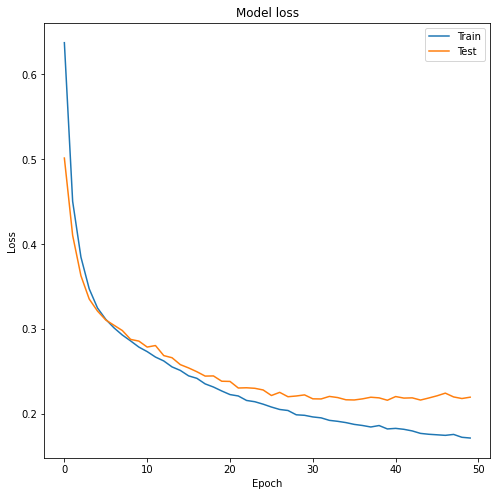

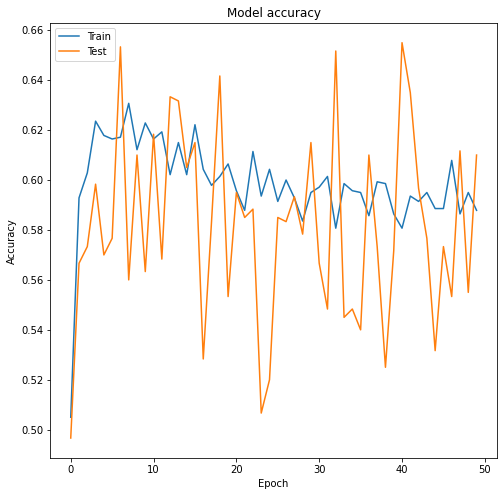

In [177]:
# Train your model and save its history
h_callback = model.fit(X_train, y_train, epochs = 50,
               validation_data=(X_test, y_test))

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['acc'], h_callback.history['val_acc'])



```
1400/1400 [==============================] - 0s 92us/step - loss: 0.1678 - acc: 0.9310 - val_loss: 0.2199 - val_acc: 0.9172
```


**These graphs are really useful for detecting overfitting and to know if your neural network would benefit from more training data. More on this in the next chapter!**

### Early stopping your model

<div class=""><p>The early stopping callback is useful since it allows for you to stop the model training if it no longer improves after a given number of epochs. To make use of this functionality you need to pass the callback inside a list to the model's callback parameter in the <code>.fit()</code> method.</p>
<p>The <code>model</code> you built to detect fake dollar bills is loaded for you to train, this time with early stopping. <code>X_train</code>, <code>y_train</code>, <code>X_test</code> and <code>y_test</code> are also available for you to use.</p></div>

In [192]:
df = pd.read_csv('https://github.com/lnunesAI/Datacamp/raw/main/2-machine-learning-scientist-with-python/16-introduction-to-deep-learning-with-keras/datasets/banknotes_1372x5.csv')
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)

In [200]:
model = Sequential()
model.add(Dense(1, input_shape=(4, ), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])

Instructions
<ul>
<li>Import the <code>EarlyStopping</code>callback from <code>keras.callbacks</code>.</li>
<li>Define a callback, monitor <code>'val_acc'</code> with a <code>patience</code> of 5 epochs.</li>
<li>Train your model using the early stopping callback.</li>
</ul>

In [201]:
# Import the early stopping callback
from keras.callbacks import EarlyStopping

# Define a callback to monitor val_acc
monitor_val_acc = EarlyStopping(monitor='val_acc', 
                       patience=5)

# Train your model using the early stopping callback
model.fit(X_train, y_train, 
           epochs=1000, validation_data=(X_test, y_test),
           callbacks= [monitor_val_acc])

Epoch 1/1000
30/30 [==============================] - 0s 7ms/step - loss: 0.7642 - acc: 0.5468 - val_loss: 0.7350 - val_acc: 0.5388
Epoch 2/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6849 - acc: 0.5858 - val_loss: 0.6853 - val_acc: 0.5655
Epoch 3/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.6331 - acc: 0.6075 - val_loss: 0.6413 - val_acc: 0.5947
Epoch 4/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.5999 - acc: 0.6372 - val_loss: 0.6025 - val_acc: 0.6311
Epoch 5/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.5651 - acc: 0.6436 - val_loss: 0.5687 - val_acc: 0.6602
Epoch 6/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.5498 - acc: 0.6696 - val_loss: 0.5391 - val_acc: 0.6845
Epoch 7/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.4997 - acc: 0.7126 - val_loss: 0.5133 - val_acc: 0.7087
Epoch 8/1000
30/30 [==============================] - 0s 3ms/step - loss: 0.


**Now you won't ever fall short of epochs! Your model will stop early if the quantity monitored doesn't improve for the given amount of epochs.**

### A combination of callbacks

<div class=""><p>Deep learning models can take a long time to train, especially when you move to deeper architectures and bigger datasets. Saving your model every time it improves as well as stopping it when it no longer does allows you to worry less about choosing the number of epochs to train for. You can also restore a saved model anytime and resume training where you left it. </p>
<p>The model training and validation data are available in your workspace as <code>X_train</code>, <code>X_test</code>, <code>y_train</code>, and <code>y_test</code>.</p>
<p>Use the <code>EarlyStopping()</code> and the <code>ModelCheckpoint()</code> callbacks so that you can go eat a jar of cookies while you leave your computer to work!</p></div>

Instructions
<ul>
<li>Import both the <code>EarlyStopping</code> and <code>ModelCheckpoint</code> callbacks from keras.</li>
<li>Create <code>monitor_val_acc</code> as an <code>EarlyStopping</code> callback that will monitor <code>'val_acc'</code>, with a <code>patience</code> of 3 epochs. </li>
<li>Create <code>modelCheckpoint</code> as a <code>ModelCheckpoint</code>callback, save the best model as <code>best_banknote_model.hdf5</code>.</li>
<li>Fit your model providing a <strong>list</strong> with the defined callbacks and <code>X_test</code> and <code>y_test</code> as validation data.</li>
</ul>

In [202]:
# Import the EarlyStopping and ModelCheckpoint callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stop on validation accuracy
monitor_val_acc = EarlyStopping(monitor = 'val_acc', patience = 3)

# Save the best model as best_banknote_model.hdf5
modelCheckpoint = ModelCheckpoint('best_banknote_model.hdf5', save_best_only = True)

# Fit your model for a stupid amount of epochs
h_callback = model.fit(X_train, y_train,
                    epochs = 1000000000000,
                    callbacks = [monitor_val_acc, modelCheckpoint],
                    validation_data = (X_test, y_test))

Epoch 1/1000000000000
30/30 [==============================] - 0s 5ms/step - loss: 0.1953 - acc: 0.9583 - val_loss: 0.2016 - val_acc: 0.9466
Epoch 2/1000000000000
30/30 [==============================] - 0s 3ms/step - loss: 0.1937 - acc: 0.9583 - val_loss: 0.2000 - val_acc: 0.9466
Epoch 3/1000000000000
30/30 [==============================] - 0s 3ms/step - loss: 0.1922 - acc: 0.9594 - val_loss: 0.1985 - val_acc: 0.9466
Epoch 4/1000000000000
30/30 [==============================] - 0s 3ms/step - loss: 0.1906 - acc: 0.9594 - val_loss: 0.1970 - val_acc: 0.9466


**You've learned a powerful callback combo! Nice moves! Now you always save the model that performed best, even if you early stopped at one that was already performing worse.**